In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install VaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.6 MB/s eta 0:00:00


In [ ]:
!pip install flair

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 373.1/373.1 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 788.5/788.5 kB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 30.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 36.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 44.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 20.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB

In [ ]:
#general purpose packages
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

!pip install pycountry
import pycountry

import re, string
!pip install emoji
import emoji

##sentiment analysis


from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from flair.models import TextClassifier
from flair.data import Sentence
from wordcloud import WordCloud, STOPWORDS


sns.set_style("whitegrid")
sns.despine()
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlesize=14, titlepad=10)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 36.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681833 sha256=fc4004cf677b7fbbe25f7d2dcd3eb916196943025509f785db4abc12a7b9bea2
  Stored in directory: /root/.cache/pip/wheels/03/57/cc/290c5252ec97a6d78d36479a3c5e5ecc76318afcb241ad9dbe
Successfully built pycountry
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.9/358.9 kB 4.2 MB/s eta 0:00:00


<ipython-input-4-66fc5d299c01>:29: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


<Figure size 640x480 with 0 Axes>

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/pheme/dataset.csv')
data

text  is_rumor  \
0      Charlie Hebdo became well known for publishing...       0.0   
1      Now 10 dead in a shooting there today RT "@BBC...       0.0   
2      @BBCDanielS @BBCWorld I'm guessing this is bei...       0.0   
3      @BBCDanielS @BBCWorld why would you mention th...       0.0   
4                @BBCDanielS @BBCWorld perps identified?       0.0   
...                                                  ...       ...   
62440  @AnonyOps @Xplant So that means its ok to torc...       1.0   
62441  @RianAlden not at all, but they need to change...       1.0   
62442  @Xplant @AnonyOps Absoluteky.  But it pains me...       1.0   
62443  @Xplant @AnonyOps I'm curious how many of thes...       1.0   
62444  @Xplant @AnonyOps You get 15,000 people showin...       1.0   

         user.handle         topic  
0         BBCDanielS  charliehebdo  
1          robbylevy  charliehebdo  
2      ModerateInAll  charliehebdo  
3        GabTarquini  charliehebdo  
4      freethought41  charliehebdo  
...              ...           ...  
62440      RianAlden      ferguson  
62441         Xplant      ferguson  
62442      RianAlden      ferguson  
62443      RianAlden      ferguson  
62444      RianAlden      ferguson  

[62445 rows x 4 columns]

In [ ]:
data[data.duplicated()]

text  is_rumor  \
4350   @Perseus009 @guardian After the 1962 Cuban Mis...       0.0   
5520   @Independent After the 1962 Cuban Missile Cris...       0.0   
6538   @cnni Call to register for this site and gain ...       0.0   
6997   @bouckap At least 12 killed in shooting at off...       0.0   
7477   @cnni At least 12 killed in shooting at office...       0.0   
...                                                  ...       ...   
62280  MSNBC is literally reporting that Police Chief...       1.0   
62319  Remarkably, despite the military-style police ...       1.0   
62339  Americans are 8 times more likely to be killed...       1.0   
62408  I refuse to call the #Ferguson police chief in...       1.0   
62427  Police in #Ferguson once charged a man w/ dest...       1.0   

           user.handle         topic  
4350    mycubanfriends  charliehebdo  
5520    mycubanfriends  charliehebdo  
6538   ibraheemalmasri  charliehebdo  
6997         hot10news  charliehebdo  
7477         hot10news  charliehebdo  
...                ...           ...  
62280        elonjames      ferguson  
62319     TheDailyEdge      ferguson  
62339  TheEyeOfControl      ferguson  
62408   ProfessorCrunk      ferguson  
62427         AnonyOps      ferguson  

[800 rows x 4 columns]

In [ ]:
data = data.drop_duplicates()

In [ ]:
data[data.duplicated()]

Empty DataFrame
Columns: [text, is_rumor, user.handle, topic]
Index: []

In [ ]:
data['is_rumor'].value_counts()

0.0    48018
1.0    13625
Name: is_rumor, dtype: int64

<Axes: >

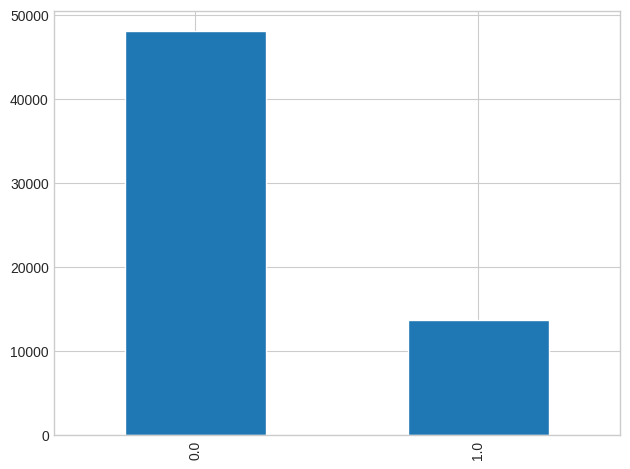

In [ ]:
data.is_rumor.value_counts().plot(kind='bar')

In [ ]:
!pip install --user -U nltk

In [ ]:
!pip install --user -U numpy

In [ ]:
!pip install vaderSentiment

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
sia_vader = SentimentIntensityAnalyzer()

In [ ]:
sentiments = []
for tweet in data.text:
    sentiment_dict = sia_vader.polarity_scores(tweet)
    sentiment_dict.pop('compound', None)
    sentiments.append(max(sentiment_dict , key=sentiment_dict.get))

In [ ]:
data['sentiment'] = sentiments
data['sentiment'].value_counts()

neu    58197
neg     1826
pos     1622
Name: sentiment, dtype: int64

In [ ]:
!pip install demoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 1.0 MB/s eta 0:00:00


In [ ]:
#text cleaning
##CUSTOM DEFINED FUNCTIONS TO CLEAN THE TWEETS

#Clean emojis from text
def strip_emoji(text):
    return re.sub(emoji.get_emoji_regexp(), r"", text) #remove emoji

#Remove punctuations, links, mentions and \r\n new line characters
def strip_all_entities(text):
    text = text.replace('\r', '').replace('\n', ' ').replace('\n', ' ').lower() #remove \n and \r and lowercase
    text = re.sub(r"(?:\@|https?\://)\S+", "", text) #remove links and mentions
    text = re.sub(r'[^\x00-\x7f]',r'', text) #remove non utf8/ascii characters such as '\x9a\x91\x97\x9a\x97'
    banned_list= string.punctuation + 'Ã'+'±'+'ã'+'¼'+'â'+'»'+'§'
    table = str.maketrans('', '', banned_list)
    text = text.translate(table)
    return text
#clean hashtags at the end of the sentence, and keep those in the middle of the sentence by removing just the # symbol
def clean_hashtags(tweet):
    new_tweet = " ".join(word.strip() for word in re.split('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', tweet)) #remove last hashtags
    new_tweet2 = " ".join(word.strip() for word in re.split('#|_', new_tweet)) #remove hashtags symbol from words in the middle of the sentence
    return new_tweet2

#Filter special characters such as & and $ present in some words
def filter_chars(a):
    sent = []
    for word in a.split(' '):
        if ('$' in word) | ('&' in word):
            sent.append('')
        else:
            sent.append(word)
    return ' '.join(sent)

def remove_mult_spaces(text): ## remove multiple spaces
    return re.sub("\s\s+" , " ", text)


def remove_spam(text):
    match = re.search(r'subscribe', text)
    if match:
        return ''
    else:
        return text

In [ ]:
data['text']=data['text'].apply(str)
data['text'] = data['text'].fillna('').apply(str)
texts_new = []
for t in data.text:
    texts_new.append(remove_spam(remove_mult_spaces(filter_chars(clean_hashtags(strip_all_entities(t))))))

In [ ]:
data['text_clean'] = texts_new

In [ ]:
data['text_clean'] = data['text_clean'].str.lower()

In [ ]:
text_len = []
for text in data.text_clean:
    tweet_len = len(text.split())
    text_len.append(tweet_len)

In [ ]:
data['text_len'] = text_len

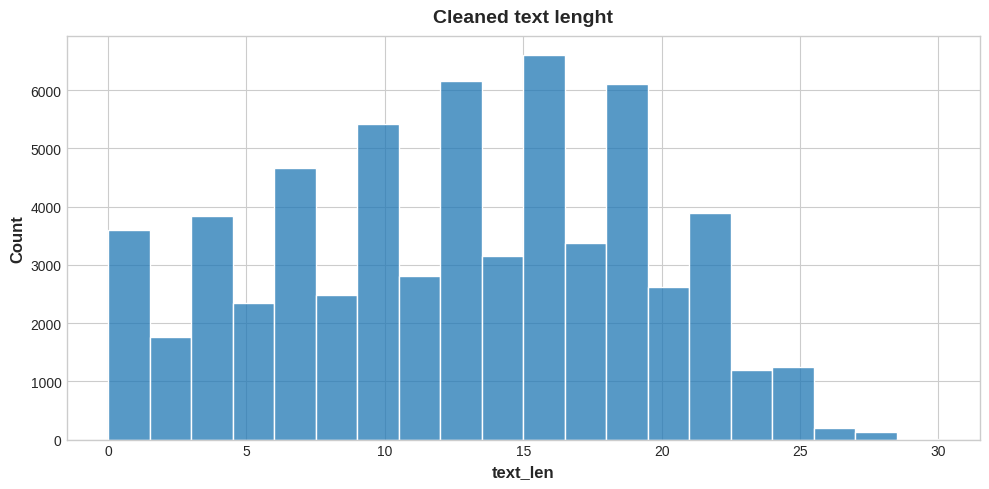

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(x='text_len', data=data, bins=20)
plt.title('Cleaned text lenght')
plt.show()

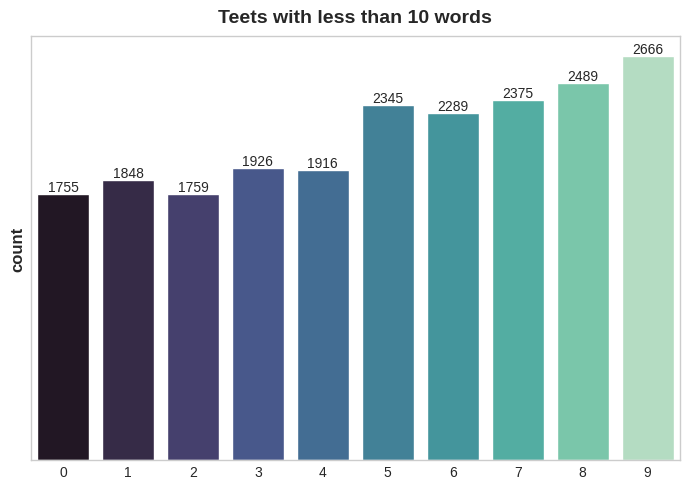

In [ ]:
plt.figure(figsize=(7,5))
ax = sns.countplot(x='text_len', data=data[data['text_len'] < 10], palette='mako')
plt.title('Teets with less than 10 words')
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

In [ ]:
data = data[data['text_len'] > 4]

In [ ]:
sia_vader = SentimentIntensityAnalyzer()

In [ ]:
sentiments_vader = []
for tweet in data.text_clean:
    sentiment_dict = sia_vader.polarity_scores(tweet)
    sentiment_dict.pop('compound', None)
    sentiments_vader.append(max(sentiment_dict , key=sentiment_dict.get))

In [ ]:
data['sentiment_vader'] = sentiments_vader
data['sentiment_vader'].value_counts()

neu    48919
neg     2261
pos     1261
Name: sentiment_vader, dtype: int64

In [ ]:
def polarity_to_text(blob):
    if (blob.sentiment.polarity >= 0.2):
        return 'pos'
    elif(blob.sentiment.polarity < 0.2 and  blob.sentiment.polarity >= -0.01):
        return 'neu'
    else:
        return 'neg'

In [ ]:
sentiments_blob = []
for tweet in data.text_clean:
    blob = TextBlob(tweet)
    sentiments_blob.append(polarity_to_text(blob))

In [ ]:
data['sentiment_blob'] = sentiments_blob
data['sentiment_blob'].value_counts()

neu    27658
neg    13556
pos    11227
Name: sentiment_blob, dtype: int64

<Axes: >

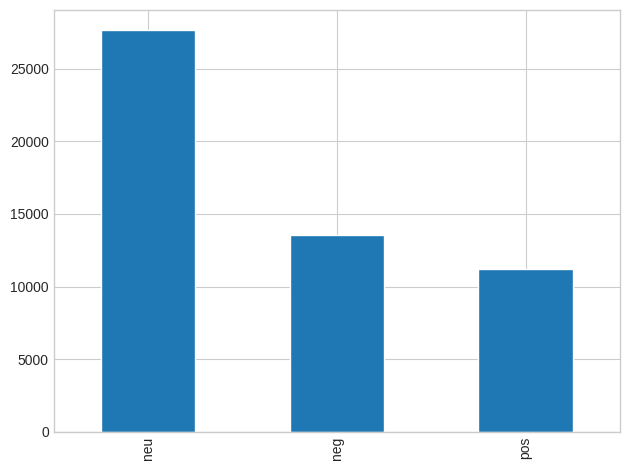

In [ ]:
data.sentiment_blob.value_counts().plot(kind='bar')

In [ ]:
data

text  is_rumor  \
0      Charlie Hebdo became well known for publishing...       0.0   
1      Now 10 dead in a shooting there today RT "@BBC...       0.0   
2      @BBCDanielS @BBCWorld I'm guessing this is bei...       0.0   
3      @BBCDanielS @BBCWorld why would you mention th...       0.0   
7      @GabTarquini @BBCDanielS @BBCWorld Maybe becau...       0.0   
...                                                  ...       ...   
62440  @AnonyOps @Xplant So that means its ok to torc...       1.0   
62441  @RianAlden not at all, but they need to change...       1.0   
62442  @Xplant @AnonyOps Absoluteky.  But it pains me...       1.0   
62443  @Xplant @AnonyOps I'm curious how many of thes...       1.0   
62444  @Xplant @AnonyOps You get 15,000 people showin...       1.0   

         user.handle         topic sentiment  \
0         BBCDanielS  charliehebdo       neu   
1          robbylevy  charliehebdo       neu   
2      ModerateInAll  charliehebdo       neu   
3        GabTarquini  charliehebdo       neu   
7         S_Jakobsen  charliehebdo       neu   
...              ...           ...       ...   
62440      RianAlden      ferguson       neu   
62441         Xplant      ferguson       neu   
62442      RianAlden      ferguson       neu   
62443      RianAlden      ferguson       neu   
62444      RianAlden      ferguson       neu   

                                              text_clean  text_len  \
0      charlie hebdo became well known for publishing...        13   
1      now 10 dead in a shooting there today rt charl...        22   
2      im guessing this is being considered terrorism...        12   
3      why would you mention that before knowing the ...        10   
7      maybe because they shouted the prophet have be...        16   
...                                                  ...       ...   
62440  so that means its ok to torch and loot someone...        11   
62441  not at all but they need to change some things...        13   
62442  absoluteky but it pains me to see private citi...        20   
62443  im curious how many of these protesters ever s...        21   
62444  you get 15000 people showing up to a city meet...        21   

      sentiment_vader sentiment_blob  
0                 neu            neu  
1                 neu            neg  
2                 neu            pos  
3                 neu            neu  
7                 neu            pos  
...               ...            ...  
62440             neu            pos  
62441             neu            neu  
62442             neu            neu  
62443             neu            pos  
62444             neu            pos  

[52441 rows x 9 columns]

In [ ]:
data[['is_rumor','sentiment_blob']]

is_rumor sentiment_blob
0           0.0            neu
1           0.0            neg
2           0.0            pos
3           0.0            neu
7           0.0            pos
...         ...            ...
62440       1.0            pos
62441       1.0            neu
62442       1.0            neu
62443       1.0            pos
62444       1.0            pos

[52441 rows x 2 columns]

In [ ]:
#no relevance
data[data['is_rumor']==1.0]

#subsetDataFrame = data[data['sentiment_blob'] == 'pos']
filterinfDataframe = data[(data['is_rumor'] == 1.0) & (data['sentiment_blob'] =='pos') ]

In [ ]:
filterinfDataframe = data[(data['is_rumor'] == 1.0) & (data['sentiment_blob'] =='pos')]
filterinfDataframe

text  is_rumor  \
30925  @H_E_Samuel Hi Henry would you be willing to g...       1.0   
30926  @H_E_Samuel @H_E_Samuel please call them terro...       1.0   
30931  @EdwardBowden @H_E_Samuel @George_Berridge bla...       1.0   
30940  @euronews LOL. 5 million Muslims in France, wh...       1.0   
30942  @Channel4News @GidonShaviv must be that peace ...       1.0   
...                                                  ...       ...   
62417  @ProfessorCrunk Right now, he's fighting for h...       1.0   
62423  @ProfessorCrunk you don't have to be competent...       1.0   
62440  @AnonyOps @Xplant So that means its ok to torc...       1.0   
62443  @Xplant @AnonyOps I'm curious how many of thes...       1.0   
62444  @Xplant @AnonyOps You get 15,000 people showin...       1.0   

          user.handle     topic sentiment  \
30925    NickyRusmith       NaN       neu   
30926         pravsly       NaN       neu   
30931      imranali27       NaN       neu   
30940  NeoSkywalker13       NaN       neu   
30942         onielio       NaN       pos   
...               ...       ...       ...   
62417  aagha_personal  ferguson       neu   
62423  ElGringoSpeaks  ferguson       neu   
62440       RianAlden  ferguson       neu   
62443       RianAlden  ferguson       neu   
62444       RianAlden  ferguson       neu   

                                              text_clean  text_len  \
30925  hi henry would you be willing to give itv news...        20   
30926  please call them terrorists not gunmen dont di...        21   
30931  blame the shooter not the religion because the...        16   
30940  lol 5 million muslims in france what a disgrac...        21   
30942           must be that peace loving religion again         7   
...                                                  ...       ...   
62417  right now hes fighting for his jobnot justice ...        14   
62423      you dont have to be competent to be malicious         9   
62440  so that means its ok to torch and loot someone...        11   
62443  im curious how many of these protesters ever s...        21   
62444  you get 15000 people showing up to a city meet...        21   

      sentiment_vader sentiment_blob  
30925             neu            pos  
30926             neu            pos  
30931             neu            pos  
30940             neu            pos  
30942             pos            pos  
...               ...            ...  
62417             neu            pos  
62423             neu            pos  
62440             neu            pos  
62443             neu            pos  
62444             neu            pos  

[2157 rows x 9 columns]

In [ ]:
!pip install flair

In [ ]:
from flair.nn import Classifier
from flair.data import Sentence
import pandas as pd

# Load the sentiment classifier
tagger = Classifier.load('sentiment')

# Assuming 'data' is your DataFrame
# Assuming 'data' is your DataFrame
sentiment_labels = []

# Iterate through each row in the DataFrame
for text_clean in data['text_clean']:
    sentence = Sentence(text_clean)
    tagger.predict(sentence)
    label = sentence.labels[0].value
    sentiment_labels.append(label)

# Add the sentiment_labels list as a new column named 'label' in the DataFrame
#data['label'] = sentiment_labels


2023-08-29 05:19:41,880 https://nlp.informatik.hu-berlin.de/resources/models/sentiment-curated-distilbert/sentiment-en-mix-distillbert_4.pt not found in cache, downloading to /tmp/tmp3eomhzt6


100%|██████████| 253M/253M [00:15<00:00, 17.3MB/s]

2023-08-29 05:19:57,865 copying /tmp/tmp3eomhzt6 to cache at /root/.flair/models/sentiment-en-mix-distillbert_4.pt


2023-08-29 05:19:59,033 removing temp file /tmp/tmp3eomhzt6


In [ ]:
data['label'] = sentiment_labels

In [ ]:
data

text  is_rumor  \
0      Charlie Hebdo became well known for publishing...       0.0   
1      Now 10 dead in a shooting there today RT "@BBC...       0.0   
2      @BBCDanielS @BBCWorld I'm guessing this is bei...       0.0   
3      @BBCDanielS @BBCWorld why would you mention th...       0.0   
7      @GabTarquini @BBCDanielS @BBCWorld Maybe becau...       0.0   
...                                                  ...       ...   
62440  @AnonyOps @Xplant So that means its ok to torc...       1.0   
62441  @RianAlden not at all, but they need to change...       1.0   
62442  @Xplant @AnonyOps Absoluteky.  But it pains me...       1.0   
62443  @Xplant @AnonyOps I'm curious how many of thes...       1.0   
62444  @Xplant @AnonyOps You get 15,000 people showin...       1.0   

         user.handle         topic sentiment  \
0         BBCDanielS  charliehebdo       neu   
1          robbylevy  charliehebdo       neu   
2      ModerateInAll  charliehebdo       neu   
3        GabTarquini  charliehebdo       neu   
7         S_Jakobsen  charliehebdo       neu   
...              ...           ...       ...   
62440      RianAlden      ferguson       neu   
62441         Xplant      ferguson       neu   
62442      RianAlden      ferguson       neu   
62443      RianAlden      ferguson       neu   
62444      RianAlden      ferguson       neu   

                                              text_clean  text_len  \
0      charlie hebdo became well known for publishing...        13   
1      now 10 dead in a shooting there today rt charl...        22   
2      im guessing this is being considered terrorism...        12   
3      why would you mention that before knowing the ...        10   
7      maybe because they shouted the prophet have be...        16   
...                                                  ...       ...   
62440  so that means its ok to torch and loot someone...        11   
62441  not at all but they need to change some things...        13   
62442  absoluteky but it pains me to see private citi...        20   
62443  im curious how many of these protesters ever s...        21   
62444  you get 15000 people showing up to a city meet...        21   

      sentiment_vader sentiment_blob     label  
0                 neu            neu  POSITIVE  
1                 neu            neg  POSITIVE  
2                 neu            pos  NEGATIVE  
3                 neu            neu  NEGATIVE  
7                 neu            pos  NEGATIVE  
...               ...            ...       ...  
62440             neu            pos  NEGATIVE  
62441             neu            neu  NEGATIVE  
62442             neu            neu  NEGATIVE  
62443             neu            pos  NEGATIVE  
62444             neu            pos  POSITIVE  

[52441 rows x 10 columns]

In [ ]:
data.label.value_counts()

NEGATIVE    37543
POSITIVE    14898
Name: label, dtype: int64

In [ ]:
from flair.nn import Classifier
from flair.data import Sentence
tagger = Classifier.load('sentiment')
labels = []
for sentence in data.text_clean:
  sentence = Sentence(sentence)
  tagger.predict(sentence)
  labels.append(sentence)

In [ ]:
tagger = Classifier.load('sentiment')

2023-08-01 12:02:26,005 https://nlp.informatik.hu-berlin.de/resources/models/sentiment-curated-distilbert/sentiment-en-mix-distillbert_4.pt not found in cache, downloading to /tmp/tmpux3s6vo_


100%|██████████| 253M/253M [00:12<00:00, 21.2MB/s]

2023-08-01 12:02:39,021 copying /tmp/tmpux3s6vo_ to cache at /root/.flair/models/sentiment-en-mix-distillbert_4.pt


2023-08-01 12:02:40,230 removing temp file /tmp/tmpux3s6vo_


In [ ]:
labels = []
for sentence in data.text_clean:
  sentence = Sentence(sentence)
  tagger.predict(sentence)
  labels.append(sentence)

In [ ]:
labels

[Sentence[13]: "charlie hebdo became well known for publishing the muhammed cartoons two years ago" → POSITIVE (0.8915),
 Sentence[22]: "now 10 dead in a shooting there today rt charlie hebdo became well known for publishing the muhammed cartoons two years ago" → POSITIVE (0.5755),
 Sentence[12]: "im guessing this is being considered terrorism right now or lone wolf" → NEGATIVE (0.9958),
 Sentence[10]: "why would you mention that before knowing the facts islamphobiaatitsbest" → NEGATIVE (0.9868),
 Sentence[16]: "maybe because they shouted the prophet have been avenged thus making it relevant to the story" → NEGATIVE (0.6329),
 Sentence[11]: "whats your source ive not heard that reported as of yet" → NEGATIVE (0.9458),
 Sentence[17]: "several men in black cagoules were heard to shout the prophet has been avenged wrote pierre de" → NEGATIVE (0.9908),
 Sentence[12]: "cossette a broadcast journalist with europe1 news hope that helps mate from" → POSITIVE (0.9936),
 Sentence[9]: "not quite 

In [ ]:
label_all = []
statement = []
for i in sentence:
  for label in sentence.get_labels():
      # print label value and score
      if(label.score<60):
        label_all.append('neutral')
        #statement.append(i)
        #print(f'label.value is: "{label.value}"')
        #print(f'label.score is: "{label.score}"')
        #label_all.append(label.value)
      else:
        label_all.append(label.value)


In [ ]:
label_all


['neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral']

In [ ]:
data.label_all.value_counts()

Neutral    52441
Name: label_all, dtype: int64